# Brazil - Analysis of the economy by state

**Goals** : 
- Analysis of global changes. 
- Compare the region of Rio de Janeiro to other one.

**Factors** : GDP

**Facts** Rio 2016 : 
- Date : 5 to 21 August 2016
- Election :2 October 2009

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 

gdp_per_region = pd.read_csv('datasets_full/Rio/brazil_gdp.csv', delimiter = ',')

In [39]:
gdp_per_region

,state,region,year,value
0,Rondônia,Madeira-Guaporé,2002,2.903643e+06
1,Rondônia,Madeira-Guaporé,2003,3.542367e+06
2,Rondônia,Madeira-Guaporé,2004,4.328271e+06
3,Rondônia,Madeira-Guaporé,2005,4.871566e+06
4,Rondônia,Madeira-Guaporé,2006,5.210186e+06
...,...,...,...,...
2187,Distrito Federal,Distrito Federal,2013,1.759067e+08
2188,Distrito Federal,Distrito Federal,2014,1.974321e+08
2189,Distrito Federal,Distrito Federal,2015,2.156129e+08
2190,Distrito Federal,Distrito Federal,2016,2.355400e+08


In [40]:
gdp_per_state = gdp_per_region.groupby(['state','year']).sum()['value']

gdp_per_state

state      year
Acre       2002     2971301.28
           2003     3377234.25
           2004     3784002.58
           2005     4300581.27
           2006     4661806.96
                      ...     
Tocantins  2013    23796656.41
           2014    26189322.64
           2015    28930290.80
           2016    31584816.20
           2017    34101687.37
Name: value, Length: 432, dtype: float64

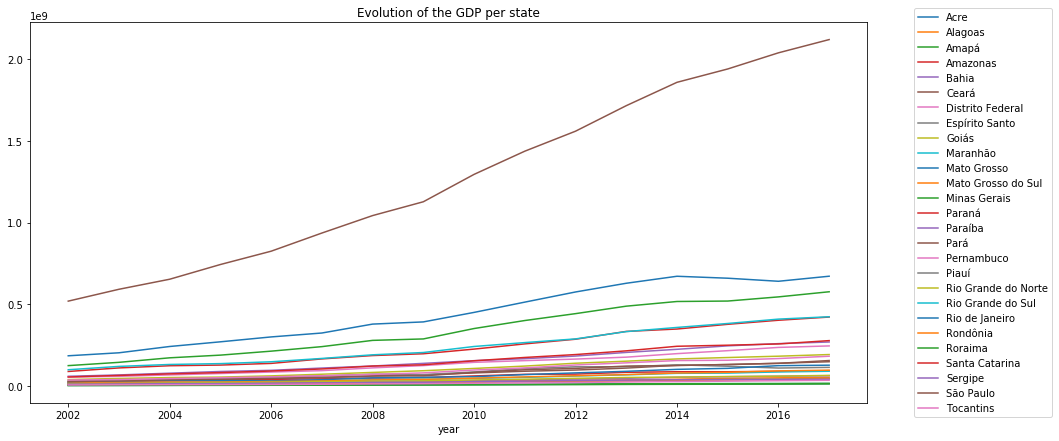

In [50]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_region.groupby(['year','state']).sum()['value'].unstack().plot(ax=ax)

plt.legend(title = 'States')

plt.legend(bbox_to_anchor=(1.05, 1.05), bbox_transform=ax.transAxes)

plt.title("Evolution of the GDP per state")

plt.draw()

**Comment** : Increase for the richest regions (for others?). Sao Paulo and Rio de Janeiro are the richest. 

In [42]:
gdp_per_state.to_csv('brazil_gdp_per_state.csv')

**Comment** : Continuation of the analysis with a new dataset : brazil_gdp_per_state_modif.csv

we added on excel the variation of the GDP per year for each region :  i.e $v_{n,k} = \frac{X_{n,k} - X_{n-1,k}}{X_{n-1,k}}$


In [43]:
gdp_per_state_var = pd.read_csv('brazil_gdp_per_state_modif.csv', delimiter = ';')

In [44]:
gdp_per_state_var = gdp_per_state_var.drop(gdp_per_state_var.columns[2], axis='columns')

gdp_per_state_var

,state,year,variation
0,Acre,2002,0.000000
1,Acre,2003,0.136618
2,Acre,2004,0.120444
3,Acre,2005,0.136516
4,Acre,2006,0.083995
...,...,...,...
427,Tocantins,2013,0.150462
428,Tocantins,2014,0.100546
429,Tocantins,2015,0.104660
430,Tocantins,2016,0.091756


In [54]:
gdp_per_state_var_rest = gdp_per_state_var[gdp_per_state_var['year']>=2012]

gdp_per_state_var_rest

,state,year,variation
10,Acre,2012,0.132801
11,Acre,2013,0.131783
12,Acre,2014,0.172981
13,Acre,2015,0.012193
14,Acre,2016,0.009648
...,...,...,...
427,Tocantins,2013,0.150462
428,Tocantins,2014,0.100546
429,Tocantins,2015,0.104660
430,Tocantins,2016,0.091756


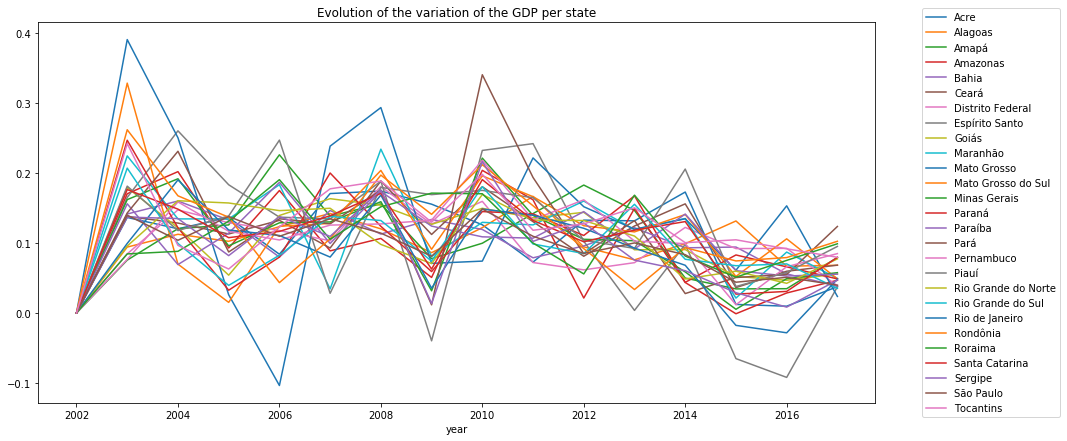

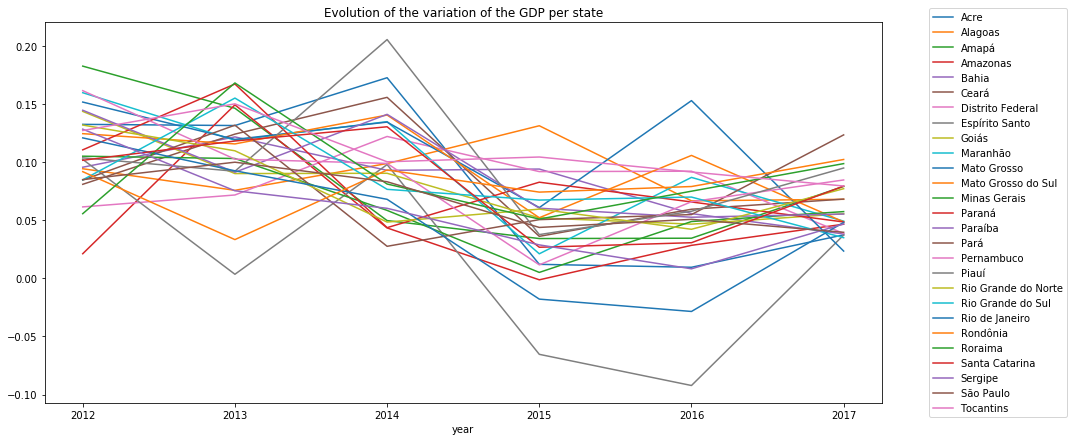

In [55]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_state_var.groupby(['year','state']).sum()['variation'].unstack().plot(ax=ax)

plt.legend(title = 'States')

plt.legend(bbox_to_anchor=(1.05, 1.05), bbox_transform=ax.transAxes)

plt.title("Evolution of the variation of the GDP per state")

plt.draw()

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_state_var_rest.groupby(['year','state']).sum()['variation'].unstack().plot(ax=ax)

plt.legend(title = 'States')

plt.legend(bbox_to_anchor=(1.05, 1.05), bbox_transform=ax.transAxes)

plt.title("Evolution of the variation of the GDP per state")

plt.draw()

**Comment** : Our goal was to find whether there is an increase in term of GDP for Rio de Janeiro because of the Olympic Games. 

(We can indentify Rio by displaying the value of its variation)

In [47]:
gdp_var_rio = gdp_per_state_var[gdp_per_state_var['state'] == 'Rio de Janeiro']

gdp_var_rio

,state,year,variation
320,Rio de Janeiro,2002,0.000000
321,Rio de Janeiro,2003,0.099451
322,Rio de Janeiro,2004,0.190317
323,Rio de Janeiro,2005,0.118667
324,Rio de Janeiro,2006,0.110841
325,Rio de Janeiro,2007,0.079937
326,Rio de Janeiro,2008,0.168637
327,Rio de Janeiro,2009,0.035331
328,Rio de Janeiro,2010,0.148620
329,Rio de Janeiro,2011,0.139844


In [ ]:
gdp_var_rio_rest = gdp_var_rio[gdp_var_rio['year']>=2012]

gdp_var_rio_rest

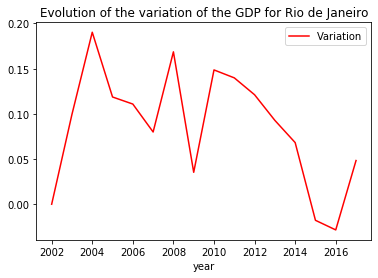

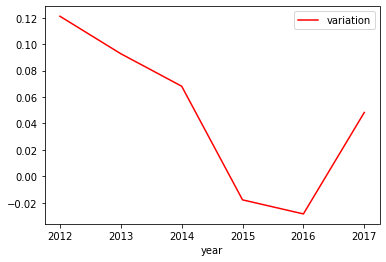

In [56]:
gdp_var_rio.plot(x='year', y='variation', c='red', label = "Variation")

plt.title("Evolution of the variation of the GDP for Rio de Janeiro")

gdp_var_rio_rest.plot(x='year', y='variation', c='red')

**Comment** : As the graph of the evolution of the variation per region was not really readable, we will restrict to [2012,2017]

**Possible explanation** : Economic crisis, election of Rio de Janeiro for the Olympic Games in 2016, recession, growth after the OG 